# Modelado de Ventas - Proyecto MLOps
Este notebook desarrolla el componente de modelado para el dataset de ventas minoristas, siguiendo estos pasos:
- Listado de técnicas
- Definición de métrica de error
- División de datos en entrenamiento/testing
- Entrenamiento de modelo (Random Forest)
- Evaluación con métricas


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, explained_variance_score
import numpy as np

# Cargar dataset limpio
df = pd.read_csv('data/retail_clean.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSale,Devolucion,Mes
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,False,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,False,2009-12


In [9]:
# Copia del dataset
df_model = df.copy()
df_model = df_model.drop(columns=['Invoice', 'InvoiceDate', 'Customer ID', 'Description'])

# Codificación de variables categóricas
for col in ['StockCode', 'Country', 'Mes']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))


In [10]:
# Eliminar columna con mucha cardinalidad
X = df_model.drop(columns=['TotalSale', 'StockCode'])
y = df_model['TotalSale']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest optimizado
model = RandomForestRegressor(n_estimators=30, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=30, random_state=42)

In [11]:
# Predicción y métricas
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
medae = median_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MedAE: {medae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"Explained Variance: {explained_var:.4f}")

MSE: 74.33
R²: 0.9836
MAE: 3.26
RMSE: 8.62
MedAE: 1.84
MAPE: 42.06%
Explained Variance: 0.9836


## Gráfica: Valores reales vs predichos

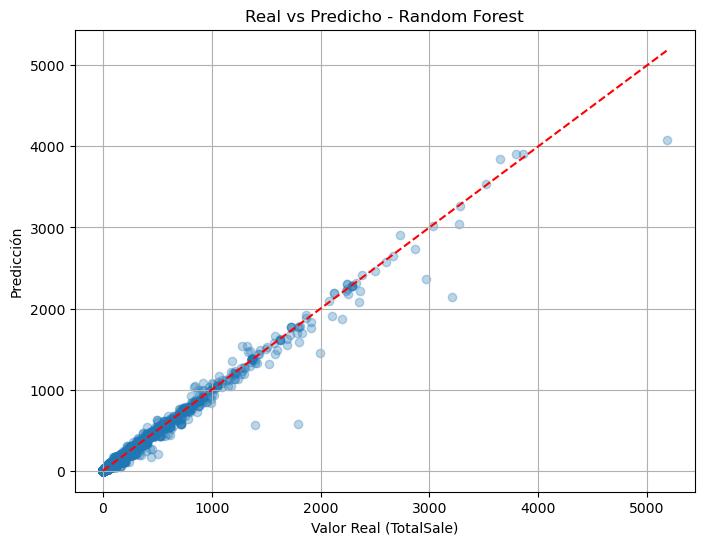

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor Real (TotalSale)')
plt.ylabel('Predicción')
plt.title('Real vs Predicho - Random Forest')
plt.grid(True)
plt.show()